# Week 6 Homework

This homework provides an opportunity for you to practice the most important topics we discussed in week 5 and 6. It will also prepare you for week 7 of this course.

## Submission guidelines:
**`Please display all your output using the print() or display() functions`**

**Once you are done, remove all the output (`Right click on screen --> Clear All Outputs`), save your file as: `YourFirstName_YourLastName_Week_6_SectionNumber.ipynb`.**

## Note
 - Please set `pandas` `display precision` to `2`. 

# Question 1: Packages for fast Exploratory Data Analysis (EDA)

<p style="text-align: center;"> <img src=https://www.dropbox.com/s/fl2zv2pxavee42e/Titanic_4.jpg?raw=1 width=800/>




In the last several years, there has been an explosion of packages that deliver `fast` data exploration with very little code (`low-code package`). Some of the most commonly used `low-code EDA (Exploratory Data Analysis)` packages are:

 - **lux:** https://pypi.org/project/lux-widget/  
 - **yopo:** https://pypi.org/project/yopo/    
 - **sweetviz:** https://pypi.org/project/sweetviz/ 
 - **autoviz:** https://pypi.org/project/autoviz/  
 - **d-tale:** https://pypi.org/project/dtale/ 
 - **ydata-profiling:**  https://pypi.org/project/pandas-profiling/
    

This question will guide you through installing `ydata-profiling`; exploring a dataset, and exporting your report to a `html` format. You are required to submit your `html` report as well. This is what you need to do:

 - Install `ydata-profiling` by running `pip install -U ydata-profiling` in a cell.
 - We will explore the famous `Titanic dataset` using this package. `Titanic dataset` contains informationof the passangers aboard the `Titanic` ship. Read the titanic dataset from `https://www.dropbox.com/s/075uxba459751z9/titanic.csv?raw=1` into a dataframe called `df_titanic`.
 - Use `ydata-profiling` to generate an exploratory report based on this dataset. You can start by running 
 
>>```python
import ydata_profiling 
profile_titanic = ydata_profiling.ProfileReport(df_titanic, title="Give a title")
profile_titanic
>>```

**Please explore the `html` file and understand the kind of analysis this package offers.**

 - **For more details:** You can see one example here: `https://docs.profiling.ydata.ai/4.5/getting-started/concepts/`.
 - Create a `html` file of the report. Set the `title` of your `html` file to `titanic_profile_created_by_Your_firstname_your_lastname_section_number`. Make sure to also name your `html` file as `titanic_profile_created_by_Your_firstname_your_lastname_section_number`. 
 - You are required to submit a zip file containing the generated `html` file.

**For Your Information:** This package recently changed its name from `pandas-profiling` to `ydata-profiling`

In [ ]:
pip install -U ydata-profiling

In [ ]:
pip install ipywidgets

In [ ]:
# Solution
import pandas as pd
pd.options.display.precision = 2
df_titanic = pd.read_csv('https://www.dropbox.com/s/075uxba459751z9/titanic.csv?raw=1')

In [ ]:
import ydata_profiling 
profile_titanic = ydata_profiling.ProfileReport(df_titanic, title="titanic_profile_created_by_Meng_Zhang_X1")
profile_titanic.to_file('titanic_profile_created_by_Meng_Zhang_X1.html')
profile_titanic

# Question 2: `Yahoo Finance`

<p style="text-align: center;"> <img src=https://www.dropbox.com/s/o7fv9wbd97p2bb5/yf.png?raw=1 width=200/>


This assignment allows you to connect to `Yahoo Finance` (https://pypi.org/project/yfinance/); get financial data, and work with it. 
`yfinance` package provides stock market data and company information. Install the `yfinance` package using `pip install yfinance`. Make sure to run that command in one cell all by itself. `yfinance` provides financial data as a `DataFrame`; this is an excellent opportunity to practice working with pandas' `DataFrame`.

 - In the stock markets, each traded company is usually recognized with a `symbol` (sometimes called `ticker`). Go to https://stockanalysis.com/stocks/ and find the symbol for `Costco Wholesale`.
 - Go ahead and explore  https://pypi.org/project/yfinance/
 - In the following cell try `import yfinance as yf`
 - Store Costco's market data (open, high, low, ... ) for the last 12 months in a `DataFrame` called `df_costco`.
 - Using `matplotlib`, plot `Open` and `Close`for the last 12 months in one plot. Please choose an appropriate plot kind. 
 - Drop columns of `Stock Splits` and `Dividends`.
 - Create a new column called `Close_to_Open_ratio` that stores the ratio of the Closing price (price at the end of the trading day) to the Opening price (price at the beginning of the trading day).
 - What is the average of the `Close_to_Open_ratio` column? Show this with proper `f-string`.  
 - Assume a day trader buys Costco's stock at the beginning of the day and sells it at the end of the day. In what fraction of days, this day trader makes money? Please answer it based on the values in the `Close_to_Open_ratio` column. Use boolean indexing.  **Another way to ask this question is: what is the probability of making some money on a typical day?**

In [ ]:
# Solution
!pip install yfinance

In [ ]:
# Costco Wholesale Corporation (COST)
import yfinance as yf
df_costco = yf.Ticker('COST').history(period="1y")
df_costco

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(df_costco.Open, label = 'Open', color = 'blue')
ax.plot(df_costco.Close, label = 'Open', color = 'red')
plt.show()

In [ ]:
df_costco2 = df_costco.drop(['Stock Splits', 'Dividends'], axis = 1)
df_costco2

In [ ]:
df_costco2['Close_to_Open_ratio'] = df_costco['Close'] / df_costco['Open']
df_costco2

In [ ]:
print(f'The average of the Close_to_Open_ratio column is {df_costco2.Close_to_Open_ratio.mean().round(5)}.')
make_money = df_costco2.Close_to_Open_ratio.gt(1).sum()
num_days = df_costco2.Close_to_Open_ratio.count()
print(f'The probability of making some money is {(make_money/num_days):.2%}.')

## Question 3: Visualizing unemployment claims

The following is the unemployment rate in the U.S. from year 2011 until 2022.

**9.8, 9.1, 8.3, 8.0, 6.6, 5.6, 4.8, 4.7, 4.0, 14.7, 4.0, 3.5**

**Step 1:** Create a `pandas` dataframe from the above numbers with years 2011-2022 being index.

**Step 2:** Use object-oriented approach of `matplotlib` to construct an appropriate plot of unemployment rates. Please feel free to consult with https://www.data-to-viz.com/ to choose the right kind of plot.

In [ ]:
# Solution
import pandas as pd
import matplotlib.pyplot as plt
unemp_rate = {'unemp_rate':[9.8, 9.1, 8.3, 8.0, 6.6, 5.6, 4.8, 4.7, 4.0, 14.7, 4.0, 3.5]}
years = [n for n in range(2011,2023)]
df_unemp_rate = pd.DataFrame(unemp_rate)
df_unemp_rate.index = years
df_unemp_rate
fig, ax = plt.subplots()
ax.plot(df_unemp_rate.unemp_rate, color = 'red');

## Question 4: Let's look at your project dataset

This question will help you start working on your project datasets. Two of the csv files look at the fuel inventory level for different tanks at different time stamps. Consider `Fuel_Level_Part_1.csv`. For the tank `T 12`, please plot inventory levels for dates after `'2019-06-15'`. 

In [ ]:
# Solution
import pandas as pd
import matplotlib.pyplot as plt

df_fuel_1 = pd.read_csv('Fuel_Level_Part_1.csv')
df_fuel_1 = df_fuel_1.set_index('Tank ID')
df_fuel_2 = df_fuel_1.loc[['T 12']]
df_fuel_2['Time stamp'] = pd.to_datetime(df_fuel_2['Time stamp'])
df_fuel_3 = df_fuel_2[df_fuel_2['Time stamp'] > '2019-06-15']
df_fuel_3
fig, ax = plt.subplots()

ax.plot(df_fuel_3['Time stamp'], df_fuel_3['Fuel Level'])
ax.set_xlabel('Date')
ax.set_ylabel('Fuel Level')
fig.autofmt_xdate(rotation=45)

## Question 5: Let's look at FIFA World Cup dataset

**Background:**

Football (soccer) is my favorite sport! I have played it for many years (and have broken my right leg three times playing footbal!) This question will help us explore statistics about the history of FIFA (Fédération Internationale de Football Association) World Cup. The **FIFA World Cup** is one of the most prominent and celebrated international soccer competitions, held every four years and featuring teams from all over the globe. It is a month-long event that attracts millions of viewers worldwide, showcasing the talents of the world's best soccer players competing for the trophy and the title of world champion.


You will have access to multiple csv files. Please read the following csv file (using `read_csv`) into dataframe and name the dataframe appropriately

bookings_link = 'https://www.dropbox.com/scl/fi/n7rhwl7a1ezsrxiwr5ie3/bookings.csv?rlkey=7vzktvhlbp8t77cjkmgcysjeh&st=w1su1dev&raw=1'

This dataset contains all the booking information for the FIFA World Cup from 1970-2022. 

**Explanation:** In soccer, a booking is a formal warning given by the referee to a player who has committed a significant foul or unsportsmanlike behavior. A player receives a yellow card for the first booking and a red card for the second, which results in ejection from the game.



In [ ]:
# solution
import pandas as pd
bookings_link = 'https://www.dropbox.com/scl/fi/n7rhwl7a1ezsrxiwr5ie3/bookings.csv?rlkey=7vzktvhlbp8t77cjkmgcysjeh&st=w1su1dev&raw=1'
df_booking = pd.read_csv(bookings_link)
df_booking

## Question 6: 

How many total yellow cards have been given in all these tournaments? (Answer is just one number). Make sure to use `f-string` for displaying the results.

In [ ]:
# Solution
numYCard = df_booking['yellow_card'].sum()
print(f'{numYCard}')

## Question 7: 

How many FIFA World Cup tournments data is available in this dataset? 

**Very strong hint:** use `nunique()` function on an appropriate column. 

Make sure to use `f-string` for displaying the results.

In [ ]:
# Solution
print(f'{df_booking['tournament_id'].nunique()}')

## Question 8: 

How many total second yellow cards have been given in all these tournaments? (Answer is just one number). Make sure to use `f-string` for displaying the results.

In [ ]:
# solution
num2YCard = df_booking['second_yellow_card'].sum()
print(f'{num2YCard}')

## Question 9: 

How many total red cards have been given in all these tournaments? (Answer is just one number). Make sure to use `f-string` for displaying the results.

In [ ]:
# solution
numRCard = df_booking['red_card'].sum()
print(f'{numRCard}')

## Question 10: 

Can you say that sum of second yellow card and red cards is equal to sum of `send-offs`? 

**Explanation:** In soccer, a *send off* refers to a player being ordered to leave the field by the referee.

Make sure to use `f-string` for answering this question.

In [ ]:
# Solution
numSendOff = df_booking['sending_off'].sum()
print(f'{bool((num2YCard+numRCard)==numSendOff)}')

## Question 11: 

Your friend *Ian*, who loves playing soccer, claims that the total number of bookings in the first half is more than in the second half! Can you use `value_counts()` to check his claim? Visualize the results using the `plot` function and ensure to select an appropriate type of plot.

In [ ]:
# Solution
import pandas as pd
import matplotlib.pyplot as plt
df_count_half = df_booking[(df_booking['match_period'] == 'first half')|(df_booking['match_period'] == 'second half')]
booking_count = df_count_half['match_period'].value_counts()

booking_count.plot(kind = 'bar')
plt.title('Bookings')
plt.xlabel('Match Period')
plt.ylabel('Number of Bookings');


## Question 12: 

My friend *Milo*, who loves playing with a soccer ball, claims that World Cup games become more aggressive over time. One way to measure level of aggressiveness is by counting number of bookings in each tournment. Use `groupby`, `count`, and `plot` functions to visualize total number of bookings in each tournment. Do you think Milo is right?

In [ ]:
# Solution
import pandas as pd
import matplotlib.pyplot as plt
bookings_by_tournament = df_booking.groupby(by = 'tournament_id')['booking_id'].count()

bookings_by_tournament.plot()
plt.title('Number of Bookings in Each World Cup Tournament')
plt.xlabel('Tournament')
plt.ylabel('Number of Bookings')
print(f'Milo is not right')

## Question 13: 

Which game had the largest number of bookings?

**Note:** This is a bit of challenging question. You may want to explore using `groupby` a bit.

In [ ]:
# Solution
bookings_by_game = df_booking.groupby(by = 'match_id')['booking_id'].count()
print(f'{bookings_by_game.idxmax()} had the largest number of bookings.')

# Question 14

Now we will explore information about the players. Please read the following csv file (using `read_csv`) into dataframe and name the dataframe appropriately

players_link = 'https://www.dropbox.com/scl/fi/k3aw29vgt0kf2vqcgein6/players.csv?rlkey=yzr8xjjdhawo5z7afg4dxklvr&st=xuqxf5qy&raw=1'

This dataset contains information about the players who participated in the FIFA World Cup from 1970 to 2022.  

In [3]:
# Solution
players_link = 'https://www.dropbox.com/scl/fi/k3aw29vgt0kf2vqcgein6/players.csv?rlkey=yzr8xjjdhawo5z7afg4dxklvr&st=xuqxf5qy&raw=1'
df_players = pd.read_csv(players_link)
df_players

,key_id,player_id,family_name,given_name,birth_date,female,goal_keeper,defender,midfielder,forward,count_tournaments,list_tournaments,player_wikipedia_link
0,1,P-35894,A'Court,Alan,1934-09-30,0,0,0,0,1,1,1958,https://en.wikipedia.org/wiki/Alan_A%27Court
1,2,P-29915,Aarønes,Ann Kristin,1973-01-19,1,0,0,1,1,2,"1995, 1999",https://en.wikipedia.org/wiki/Ann_Kristin_Aar%...
2,3,P-03484,Aaronson,Brenden,2000-10-22,0,0,0,0,1,1,2022,https://en.wikipedia.org/wiki/Brenden_Aaronson
3,4,P-04189,Abadzhiev,Stefan,1934-07-03,0,0,0,0,1,1,1966,https://en.wikipedia.org/wiki/Stefan_Abadzhiev
4,5,P-03523,Abalo,Jean-Paul,1975-06-26,0,0,1,0,0,1,2006,https://en.wikipedia.org/wiki/Jean-Paul_Abalo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10396,10397,P-31085,Żurkowski,Szymon,1997-09-25,0,0,0,1,0,1,2022,https://en.wikipedia.org/wiki/Szymon_%C5%BBurk...
10397,10398,P-59568,Zurrer,Emily,1987-07-12,1,0,1,0,0,2,"2011, 2015",https://en.wikipedia.org/wiki/Emily_Zurrer
10398,10399,P-51653,Zusi,Graham,1986-08-18,0,0,0,1,0,1,2014,https://en.wikipedia.org/wiki/Graham_Zusi
10399,10400,P-05885,Zygmantovich,Andrei,1962-12-02,0,0,0,1,0,1,1990,https://en.wikipedia.org/wiki/Andrei_Zygmantovich


# Question 15

How many rows does this dataset have? You must use `f-string` to show the results.

In [6]:
# Solution
print(f'This dataset have {len(df_players)} rows')

This dataset have 10401 rows


# Question 16

Professor Naser claims that `player_id` is a unique number assigned to each player. Can you use `nunique` function along with the answer to the previous part to check his claim? 

In [9]:
# Solution
df_players.player_id.nunique()
print(f'player_id is a unique number assigned to each player')

player_id is a unique number assigned to each player


# Question 17

Visualize number of `male` and `female` players in this dataset. Make sure that your plot has appropriate `xlabel`, `ylabel`, and `title`. Feel free to use `matplotlib`, `pandas`, or `seaborn` for visualization

Text(0, 0.5, 'Number of players')

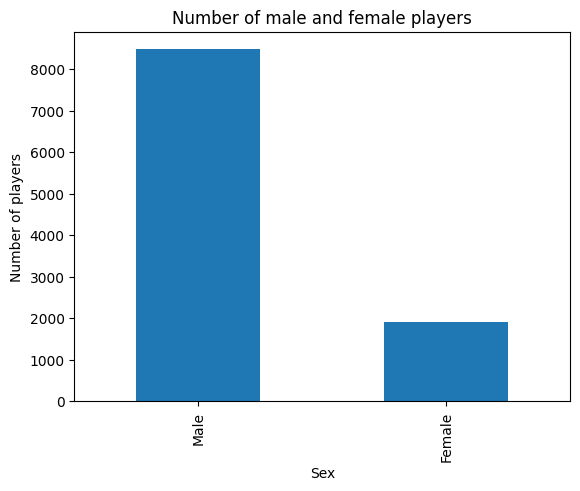

In [12]:
# Solution
import pandas as pd
import matplotlib.pyplot as plt
sex_count = df_players.female.value_counts()
sex_count.index = sex_count.index.map({0: 'Male', 1: 'Female'})
sex_count.plot(kind = 'bar')
plt.title('Number of male and female players')
plt.xlabel('Sex')
plt.ylabel('Number of players')

# Question 18

Some players may play in more than one tournment. How many players have played in just one tournment? You must use `f-string` to show the results.

In [ ]:
# Solution
one_time = df_players.count_tournaments.value_counts()
print(f'{one_time.get(1)} players have played in just one tournment')

# Question 19

The following dataset contains information about the award winners:

awards_winners_link = 'https://www.dropbox.com/scl/fi/etewiuf5muakg7pw3n2za/award_winners.csv?rlkey=fh9ad72jmnyzdsqaf4uuli52n&st=e907k6bq&raw=1'

Using `read_csv`, create a dataframe for awards winners. How many `Golden Gloves` awards were given in all of these tournments? You must use `f-string` to show the results.

In [ ]:
# Solution
awards_winners_link = 'https://www.dropbox.com/scl/fi/etewiuf5muakg7pw3n2za/award_winners.csv?rlkey=fh9ad72jmnyzdsqaf4uuli52n&st=e907k6bq&raw=1'
df_winner = pd.read_csv(awards_winners_link)
df_winner
print(f'{df_winner.award_name.value_counts().get('Golden Glove')} Golden Gloves awards were given')